# Serpent 2 Analysis Toolkit

This toolkit was developed for the Weighted Delta-tracking implementation into Serpent 2. It provides the ability to upload multiple Serpent 2 output files and compare their data.

## Initialization

Import the analysis core code, set `matplotlib` to plot inline and run nosetests (Warnings are exepcted due to pyne not being QA complient)

In [2]:
import analysis.core as wdt
import analysis.helper as wdt_help
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!nosetests

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)
..................FFE....../home/josh/repos/WDT_Analysis/analysis/core.py:139: UserWarning: This does not appear to be a square matrix, skipping reshape
  warnings.warn('This does not appear to be a square matrix, skipping reshape')
......................
ERROR: fom_tests.TestClass.test_collapse_values
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/josh/lib/anaconda2/lib/python2.7/site-packages/nose/case.py", line 197, in runTest
    self.test(*self.arg)
  File "/home/josh/repos/WDT_Analysis/tests/fom_tests.py", line 154, in test_collapse_values
    ok_(all([c in data[:,0] for c in self.cycles]))
TypeError: 'NoneType' object has no attribute '__getitem__'

FAIL: Collapsed group FOM should return the correct shape
------------------------

### Set Base Directory
Set the abslute location of the `wdt_runs` repo.

Ex: if the absolute path of the repo is `/home/josh/repos/wdt_runs/`:

```base_dir = '/home/josh/repos/'```

In [2]:
base_dir = '/home/josh/repos/'

# Scratch

Upload all 10 runs for 0.1/0.1 ST/WDT thresholds:

In [3]:
st_th = 0.1
wdt_th = 0.1
data = wdt.ParamData(st_th, wdt_th, base_dir)

array([[  9.46000000e-04,   3.96000000e-04,   3.84000000e-04,
          3.71000000e-04,   3.56000000e-04,   3.77000000e-04,
          3.91000000e-04,   3.22000000e-04,   3.05000000e-04,
          2.51700000e-04,   6.40000000e-04],
       [  3.27206357e-04,   7.92716847e-05,   8.90168523e-05,
          8.97162193e-05,   1.03266645e-04,   9.10000000e-05,
          1.16657619e-04,   1.04766407e-04,   1.04618354e-04,
          1.09599316e-04,   3.00931886e-04]])

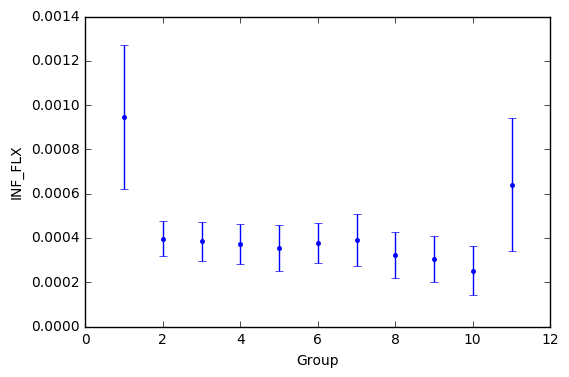

In [7]:
data.value_stat('INF_FLX', err = True, plot = True)

Calculate individual FOMs:

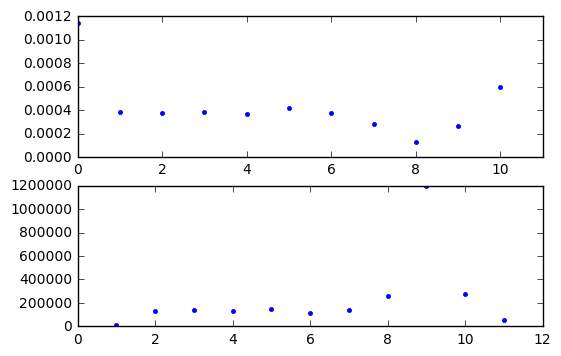

In [30]:
i = 0
inf_flx_err = data.dataSets[i].get_data('INF_FLX', err = True)
cpu = data.dataSets[i].get_cpu()
plt.subplot(211)
plt.plot(inf_flx_err[0],'.')
plt.xlim(0,11)
flx_fom = np.power(np.power(inf_flx_err,2)*cpu,-1)
plt.subplot(212)
plt.xlim(0,12)
plt.plot(range(1,12),flx_fom[0], '.')
plt.show()

([0.41180499999999998,
  0.41180600000000001,
  0.411804,
  0.411804,
  0.41180499999999998,
  0.411804,
  0.411804,
  0.411804,
  0.41180499999999998,
  0.41180499999999998],
 [6.5888799999999994e-07,
  5.3534780000000005e-07,
  9.4714919999999996e-07,
  9.059688000000001e-07,
  7.8242949999999999e-07,
  7.8242759999999998e-07,
  6.1770599999999999e-07,
  5.3534520000000004e-07,
  1.0295125000000001e-06,
  4.9416599999999998e-07])

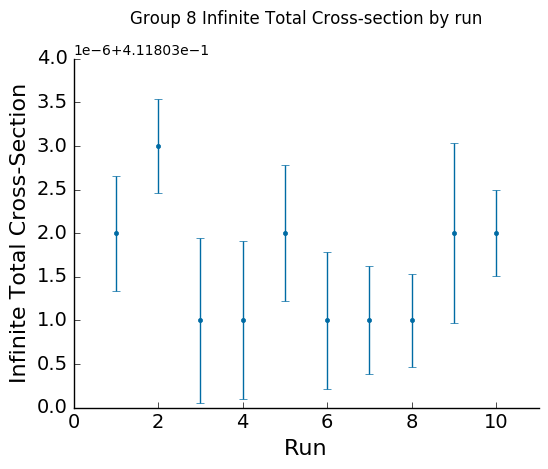

In [8]:
i = 7
s_plot('Run', 'Infinite Total Cross-Section','Group '+ str(i + 1) + ' Infinite Total Cross-section by run')
plt.xlim(0,11)
#ax.yaxis.get_major_formatter().set_powerlimits((-5, 4))
v = []
e = []
for d in data.dataSets:
    value = d.get_data('INF_TOT', err = False)[0][i]
    v.append(value)
    e.append(value*d.get_data('INF_TOT', err = True)[0][i])
plt.errorbar(range(1,11), v, fmt = '.', yerr = e, color=[0.0,107.0/255,164.0/255])
v, e

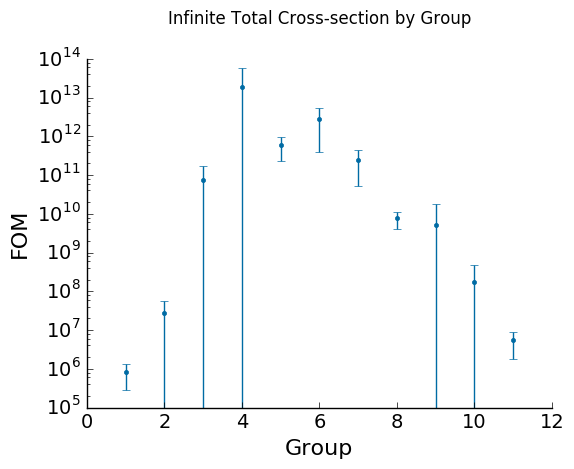

In [66]:
d = data.fom_stat('INF_TOT',plot=False)
s_plot('Group', 'FOM', 'Infinite Total Cross-section by Group')
plt.errorbar(range(1,12), d[0], fmt = '.', yerr = d[1], color=base_color)
plt.xlim(0,12)
ax = plt.gca()
ax.set_yscale('log')

In [5]:
def s_plot(xlabel, ylabel, title):
    base_color = ([0.0,107.0/255,164.0/255])
    plt.figure(figsize=(6, 4.5))
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylabel,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.title(title, y=1.08)
    plt.xlim(0,11)
    ax.yaxis.get_major_formatter().set_powerlimits((-3, 4))

## Analysis Tools

The `Analyzer` class is the workhorse of this data analysis, it initializes:

`wdt.Analyzer(st_vals, wdt_vals, base_dir, base_st=0.1, base_wdt=0.1)`

In [ ]:
st_vals = [0.1]
wdt_vals = [0.1,0.2,0.3,0.4]
my_analyzer = wdt.Analyzer(st_vals, wdt_vals, base_dir)

### plot_mat

For a matrix quantity (like scattering matrices), this function will calculate the FOM (mean or stdev) for each cell, and then graph a heatmap of where the values are highest. Parameters are passed in a list of tuples to compare graphs (maximum of 10 graphs).

In [ ]:
params = [(0.1, 0.1), (0.1, 0.2)] # Parameters to plot (list of tuples)
my_analyzer.plot_mat('INF_SP0',params, mean = True) # Mean                               

In [ ]:
my_analyzer.plot_mat('INF_SP0', params, mean = False) #Stdev

In [ ]:
plt.figure(1)
plt.subplot(221)
my_analyzer.dataSets[0].mat_stat('INF_SP0', plot = True)
plt.subplot(222)
my_analyzer.dataSets[2].mat_stat('INF_SP0', plot = True)
plt.tight_layout()
plt.show()

In [ ]:
n = 4

assert n < 10, 'must pass less than 10 parameter sets'

rows = int((n-1)/3) + 1

plot_num = rows*100 + 30 + 1

for data in my_analyzer.dataSets[0:4]:
    plt.subplot(plot_num)
    data.mat_stat('INF_SP0', plot = True)
    plot_num = plot_num + 1
plt.tight_layout()


In [ ]:
param = 'INF_SCATT0'
get_mean = False
df=my_analyzer.data_frame(param,rel=False,mean=get_mean,style=False).sort_values(by='Ratio', ascending = not get_mean)[:5]
df2 = pd.concat([df.ix[:,0:2], df.ix[:,-1:]], axis=1)
print df2.to_latex(index=False).replace('\n', ' ')

In [ ]:
len(range(32))

In [ ]:
my_analyzer.histogram(['INF_FLX','INF_TOT','INF_ABS','INF_CAPT','INF_FISS','INF_SCATT0','INF_SCATT1'],mean=True)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite flux FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=16)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite total cross-section FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=14)

In [ ]:
my_analyzer.plot('INF_ABS',[0.1],[0.6])
plt.title('Infinite absorption cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=13)

In [ ]:
my_analyzer.plot('INF_CAPT',[0.1],[0.1])
plt.title('Infinite capture cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=14)